In [47]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [48]:
# Load Data
train_df = pd.read_csv("./data/train.csv")
train_df.Label = train_df.Label.astype('category')

test_df = pd.read_csv("./data/test.csv")
validation_df = pd.read_csv("./data/valid.csv")

In [49]:
train_df.describe()

,Context,Utterance,Label
count,1000000,1000000,1000000
unique,957097,736145,2
top,! op __eou__ __eot__ ? __eou__ __eot__,thank __eou__,0
freq,15,12426,500127


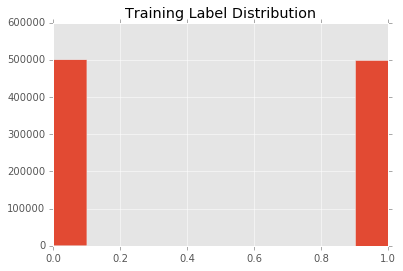

In [50]:
train_df.Label.hist()
plt.title("Training Label Distribution")

In [51]:
train_df.head()

,Context,Utterance,Label
0,i think we could import the old comment via rs...,basic each xfree86 upload will not forc user t...,1
1,i 'm not suggest all - onli the one you modifi...,sorri __eou__ i think it be ubuntu relat . __e...,0
2,afternoon all __eou__ not entir relat to warti...,"yep . __eou__ oh , okay . i wonder what happen...",0
3,interest __eou__ grub-instal work with / be ex...,that the one __eou__,1
4,and becaus python give mark a woodi __eou__ __...,( i think someon be go to make a joke about .a...,1


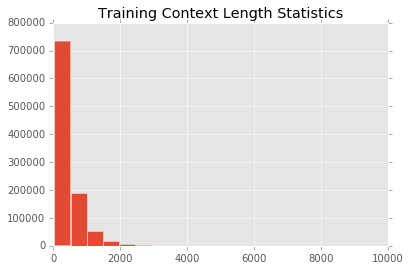

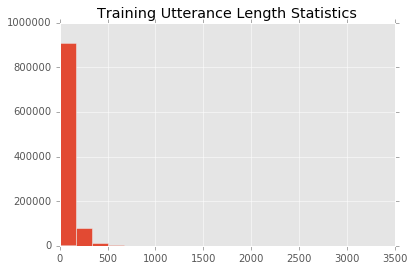

In [53]:
plt.figure(1)
train_df.Context.str.len().hist(bins=20)
plt.title("Training Context Length Statistics")

plt.figure(2)
train_df.Utterance.str.len().hist(bins=20)
plt.title("Training Utterance Length Statistics")

In [54]:
test_df.head()

,Context,Ground Truth Utterance,Distractor_0,Distractor_1,Distractor_2,Distractor_3,Distractor_4,Distractor_5,Distractor_6,Distractor_7,Distractor_8
0,anyon know whi my stock oneir export env var u...,nice thank ! __eou__,"wrong channel for it , but check efnet.org , u...","everi time the kernel chang , you will lose vi...",ok __eou__,! nomodeset > acer __eou__ i 'm assum it be a ...,http : //www.ubuntu.com/project/about-ubuntu/d...,thx __eou__ unfortun the program be n't instal...,how can i check ? by do a recoveri for test ? ...,my humbl apolog __eou__,# ubuntu-offtop __eou__
1,i set up my hd such that i have to type a pass...,"so you dont know , ok , anyon els ? __eou__ yo...","nmap be nice , but it be n't what i be look fo...",ok __eou__,cdrom work fine on window . __eou__ i dont thi...,"ah yes , i have read return as rerun __eou__",hm ? __eou__,"not the case , lts be everi other .04 releas ....",pretti much __eou__,i use the one i download from amd __eou__,"ffmpeg be part of the packag , quixotedon , at..."
2,im tri to use ubuntu on my macbook pro retina ...,just wonder how it run __eou__,"yes , that 's what i do , export it to a `` id...",noth - i be talk about the question of myhero ...,that should fix the font be too larg __eou__,"okay , so hcitool echo back hci0 < mac address...",i get to the menu with option such as tri ubun...,whi do u need analyz __eou__ it be a toy __eou...,cntrl-c may stop the command but it doe n't fi...,"if you re onli go to run ubuntu , just get a n...",the one which be not pick up at the moment be ...
3,no suggest ? __eou__ link ? __eou__ how can i ...,you cant load anyth via usb or cd when luk be ...,-p sorri ... __eou__ nmap -p22 __eou__ it doe ...,i guess so i ca n't even launch it . __eou__,note __eou__,rxvt-unicod be one __eou__,i tar all of ~ __eou__,i tar all of ~ __eou__,"i do n't realli know if i can help , but i be ...","that work just fine , thank ! __eou__",thank you __eou__
4,i just ad a second usb printer but not sure wh...,i be set it up under the printer configur __eo...,i 'd say the most common venu would be via lau...,"the old hardi man page , http : //manpages.ubu...",i ll give a tri __eou__,"by the way , the url you post for davf be from...",http : //ubuntuforums.org/showthread.php ? t=1...,"so i load up putti gui , then what do i do ? _...","you should read error messag , it say be you r...",wait the colleg semest to close just to make s...,i be call myself a jerk . all i know be that y...


In [55]:
test_df.describe()

,Context,Ground Truth Utterance,Distractor_0,Distractor_1,Distractor_2,Distractor_3,Distractor_4,Distractor_5,Distractor_6,Distractor_7,Distractor_8
count,18920,18920,18920,18920,18920,18920,18920,18920,18920,18920,18920
unique,18920,17914,13982,13902,14077,14041,14101,14072,13969,13975,14123
top,anyon here . have sourc bypass googl ? __eou__...,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__,thank __eou__
freq,1,186,176,186,194,195,167,197,190,188,201


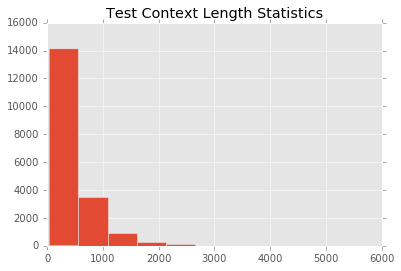

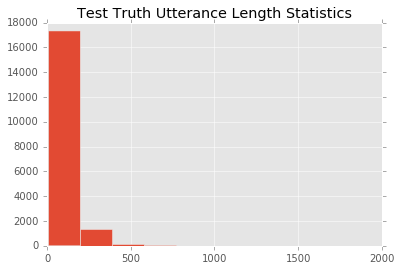

In [56]:
plt.figure(1)
test_df.Context.str.len().hist()
plt.title("Test Context Length Statistics")

plt.figure(2)
test_df["Ground Truth Utterance"].str.len().hist()
plt.title("Test Truth Utterance Length Statistics")